In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, cohen_kappa_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
veri = pd.read_csv("kategorik_anket.csv")

In [90]:
veri.head()

,Zaman damgası,Cinsiyetiniz,Yaşınız,Fakülteniz,Unnamed: 4,Sınıfınız,Genel Akademik Not Ortalamanız,Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?,Okuduğunuz kitapların seçiminde etkili olan faktör nedir?,En çok hangi eserleri okursunuz?,En çok hangi tür eserleri okursunuz?,Çizgi Romanların kitap okuma alışkanlığı kazandırdığını düşünüyor musunuz?,Sevmediğiniz kitapları yarım bırakır mısınız?,Evinizde ne kadar kitap vardır?,Kitap okumayı en sevdiğiniz yer neresidir?,Sizi okumaya motive eden nedir?,Okuduğunuz bölümün sizi kitap okumaya teşvik ettiğini düşünüyor musunuz?,Üniversiteye başladıktan sonra kitap okuma alışkanlığınızda değişiklik oldu mu?,Hangi vakitler kitap okumayı tercih edersiniz?,Çevreniz kitap okuma alışkanlığınızı etkiliyor mu?
0,28.04.2022 18:15:19,Kadın,22,Fen,NaN,4.,2-3,Yüksek,Kitabın konusu,Yerli,Roman,Evet,Evet,51-100,O'nun yanı,Dinlenme aktivitesi,Hayır,Evet,Akşam,Evet
1,28.04.2022 18:21:56,Kadın,22,Fen,NaN,4.,2-3,Yüksek,Tavsiye üzerine,Yabancı,Roman,Hayır,Hayır,100+,Ev,Dinlenme aktivitesi,Hayır,Evet,Gece,Evet
2,28.04.2022 18:23:31,Kadın,23,Fen,NaN,4.,2-3,Yüksek,Kitabın konusu,Yerli,Roman,Evet,Evet,51-100,Ev,Dinlenme aktivitesi,Hayır,Evet,Akşam,Evet
3,28.04.2022 18:25:11,Erkek,24,Mühendislik,NaN,4.,2-3,Düşük,Kitabın konusu,Yabancı,Roman,Evet,Hayır,100+,Ev,Dinlenme aktivitesi,Hayır,Evet,Akşam,Evet
4,28.04.2022 18:28:05,Kadın,22,Mühendislik,NaN,2.,1-2,Düşük,Kitabın konusu,Yabancı,Roman,Hayır,Evet,100+,O'nun yanı,Dinlenme aktivitesi,Hayır,Evet,Gece,Evet


In [3]:
veri.drop(["Unnamed: 4"], axis=1, inplace=True )

In [5]:
veri.info()
## veri setinde 20 değişken ve her bir değişkende 61 gözlem bulunmaktadır.
## her ne kadar yalnızca yaş değişkeni nitelik belirtse de; akademik ortalama, sınıf ve toplam kitap sayısı da
# nicelik belirtmektedir.
## ancak anket belli aralık olarak oluşturulduğundan kategorik veri tipinde bulunur.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   Zaman damgası                                                                    100 non-null    object
 1   Cinsiyetiniz                                                                     100 non-null    object
 2   Yaşınız                                                                          100 non-null    int64 
 3   Fakülteniz                                                                       100 non-null    object
 4   Sınıfınız                                                                        100 non-null    object
 5   Genel Akademik Not Ortalamanız                                                   100 non-null    object
 6   Kitap Okuma Alışkan

In [93]:
veri["Cinsiyetiniz"].value_counts()
## 61 kişi ile yapılan bu anket 32 kadın ve 29 erkekten oluşmaktadır.

Erkek    51
Kadın    49
Name: Cinsiyetiniz, dtype: int64

In [94]:
veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"].value_counts()

Yüksek    59
Düşük     41
Name: Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?, dtype: int64

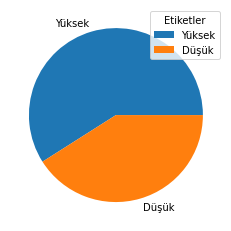

In [68]:
kategori= [59,41]
etiketler = ["Yüksek","Düşük"]

plt.pie(kategori, labels=etiketler)
plt.legend(title= "Etiketler")
plt.show()

<AxesSubplot:xlabel='Üniversiteye başladıktan sonra kitap okuma alışkanlığınızda değişiklik oldu mu?', ylabel='Yaşınız'>

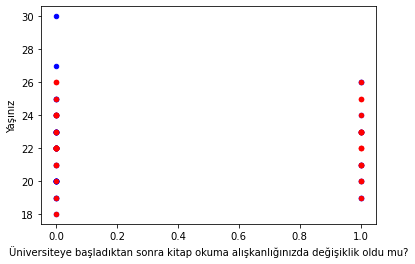

In [87]:
duzey1 = veri[veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"]==1]
duzey2= veri[veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"]==0]

ax= duzey1.plot(kind="scatter", x="Üniversiteye başladıktan sonra kitap okuma alışkanlığınızda değişiklik oldu mu?", y="Yaşınız", color="blue")
duzey2.plot(kind="scatter", x="Üniversiteye başladıktan sonra kitap okuma alışkanlığınızda değişiklik oldu mu?", y="Yaşınız", color="red", ax=ax)

In [95]:
veri["En çok hangi eserleri okursunuz?"].value_counts()

Yabancı    68
Yerli      32
Name: En çok hangi eserleri okursunuz?, dtype: int64

In [96]:
## kitap okuma alışkanlığı ile cinsiyet oranları

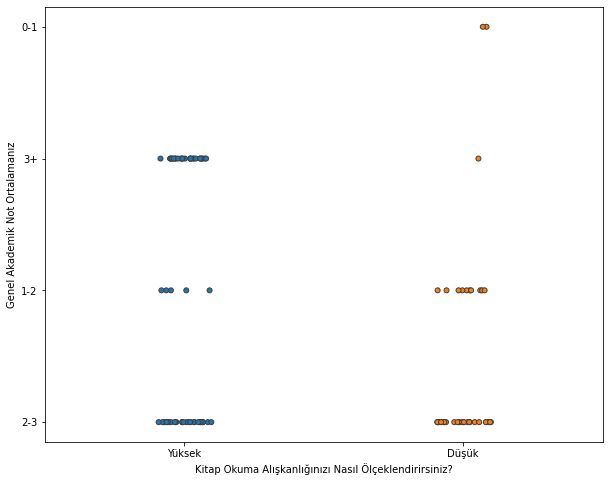

In [97]:
fig = plt.figure(figsize=(10,8))
ax = sns.stripplot(x="Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?", y="Genel Akademik Not Ortalamanız", linewidth=1, data=veri)

In [4]:
from sklearn import preprocessing

In [5]:
label_encoding= preprocessing.LabelEncoder()
#veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"] = label_encoding.fit_transform(veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"])
veri["Cinsiyetiniz"]= label_encoding.fit_transform(veri["Cinsiyetiniz"])
veri["En çok hangi eserleri okursunuz?"] = label_encoding.fit_transform(veri["En çok hangi eserleri okursunuz?"])
veri["Çizgi Romanların kitap okuma alışkanlığı kazandırdığını düşünüyor musunuz?"] =label_encoding.fit_transform(veri["Çizgi Romanların kitap okuma alışkanlığı kazandırdığını düşünüyor musunuz?"])
veri["Sevmediğiniz kitapları yarım bırakır mısınız?"] = label_encoding.fit_transform(veri["Sevmediğiniz kitapları yarım bırakır mısınız?"])
veri["Okuduğunuz bölümün sizi kitap okumaya teşvik ettiğini düşünüyor musunuz?"] = label_encoding.fit_transform(veri["Okuduğunuz bölümün sizi kitap okumaya teşvik ettiğini düşünüyor musunuz?"])
veri["Üniversiteye başladıktan sonra kitap okuma alışkanlığınızda değişiklik oldu mu?"] = label_encoding.fit_transform(veri["Üniversiteye başladıktan sonra kitap okuma alışkanlığınızda değişiklik oldu mu?"])
veri["Çevreniz kitap okuma alışkanlığınızı etkiliyor mu?"] = label_encoding.fit_transform(veri["Çevreniz kitap okuma alışkanlığınızı etkiliyor mu?"])


In [6]:
veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"] = veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"].map({"Yüksek":1, "Düşük":0})

In [7]:
veri = pd.get_dummies(data=veri, columns=["Fakülteniz"])
veri = pd.get_dummies(data=veri, columns=["Sınıfınız"])
veri = pd.get_dummies(data=veri, columns=["Genel Akademik Not Ortalamanız"])
veri = pd.get_dummies(data=veri, columns=["Okuduğunuz kitapların seçiminde etkili olan faktör nedir?"])
veri = pd.get_dummies(data=veri, columns=["En çok hangi tür eserleri okursunuz?"])
veri = pd.get_dummies(data=veri, columns=["Evinizde ne kadar kitap vardır?"])
veri = pd.get_dummies(data=veri, columns=["Kitap okumayı en sevdiğiniz yer neresidir?"])
veri = pd.get_dummies(data=veri, columns=["Sizi okumaya motive eden nedir?"])
veri = pd.get_dummies(data=veri, columns=["Hangi vakitler kitap okumayı tercih edersiniz?"])

In [102]:
veri.head()

,Zaman damgası,Cinsiyetiniz,Yaşınız,Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?,En çok hangi eserleri okursunuz?,Çizgi Romanların kitap okuma alışkanlığı kazandırdığını düşünüyor musunuz?,Sevmediğiniz kitapları yarım bırakır mısınız?,Okuduğunuz bölümün sizi kitap okumaya teşvik ettiğini düşünüyor musunuz?,Üniversiteye başladıktan sonra kitap okuma alışkanlığınızda değişiklik oldu mu?,Çevreniz kitap okuma alışkanlığınızı etkiliyor mu?,...,Kitap okumayı en sevdiğiniz yer neresidir?_Park,Kitap okumayı en sevdiğiniz yer neresidir?_Toplu Taşıma,Sizi okumaya motive eden nedir?_Bilgi ihtiyacı,Sizi okumaya motive eden nedir?_Dinlenme aktivitesi,Sizi okumaya motive eden nedir?_Okuma alışkanlığı,Sizi okumaya motive eden nedir?_Üniversite ödevleri,Hangi vakitler kitap okumayı tercih edersiniz?_Akşam,Hangi vakitler kitap okumayı tercih edersiniz?_Gece,Hangi vakitler kitap okumayı tercih edersiniz?_Sabah,Hangi vakitler kitap okumayı tercih edersiniz?_Öğle
0,28.04.2022 18:15:19,1,22,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,28.04.2022 18:21:56,1,22,1,0,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,28.04.2022 18:23:31,1,23,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,28.04.2022 18:25:11,0,24,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,28.04.2022 18:28:05,1,22,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [15]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   Zaman damgası                                                                    100 non-null    object
 1   Cinsiyetiniz                                                                     100 non-null    int32 
 2   Yaşınız                                                                          100 non-null    int64 
 3   Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?                            100 non-null    int64 
 4   En çok hangi eserleri okursunuz?                                                 100 non-null    int32 
 5   Çizgi Romanların kitap okuma alışkanlığı kazandırdığını düşünüyor musunuz?       100 non-null    int32 
 6   Sevmediğiniz kitapl

## Lojistik Regresyon

In [103]:
## Lojistik regresyona başlamadan önce bağımlı değişkenin tespit edilmesi gerekir.
# Burada araştırdığımız konu kitap okuma alışkanlığıdır. 
# Yani bağımsız değişkenler uygun B (beta) değerlerini aldığında kitap okuma alışkanlığının yüksek çıkma olasılığı

In [8]:
y = veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"]

In [9]:
x= veri.drop(["Zaman damgası","Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"], axis=1)

In [11]:
## Analize alacağımız değişkenler aşağıdaki gibidir
# Ancak bu değişkenleri kategorik durumda analiz etmek mümkün değildir.
# Bu nedenle binary kategorik değişkenleri 0-1 olarak
# Çoklu kategorik değişkenleri ise dummy (kukla) değişken kullanarak dönüşüm yapacağız.
x.head()

,Cinsiyetiniz,Yaşınız,En çok hangi eserleri okursunuz?,Çizgi Romanların kitap okuma alışkanlığı kazandırdığını düşünüyor musunuz?,Sevmediğiniz kitapları yarım bırakır mısınız?,Okuduğunuz bölümün sizi kitap okumaya teşvik ettiğini düşünüyor musunuz?,Üniversiteye başladıktan sonra kitap okuma alışkanlığınızda değişiklik oldu mu?,Çevreniz kitap okuma alışkanlığınızı etkiliyor mu?,Fakülteniz_Edebiyat,Fakülteniz_Eğitim,...,Kitap okumayı en sevdiğiniz yer neresidir?_Park,Kitap okumayı en sevdiğiniz yer neresidir?_Toplu Taşıma,Sizi okumaya motive eden nedir?_Bilgi ihtiyacı,Sizi okumaya motive eden nedir?_Dinlenme aktivitesi,Sizi okumaya motive eden nedir?_Okuma alışkanlığı,Sizi okumaya motive eden nedir?_Üniversite ödevleri,Hangi vakitler kitap okumayı tercih edersiniz?_Akşam,Hangi vakitler kitap okumayı tercih edersiniz?_Gece,Hangi vakitler kitap okumayı tercih edersiniz?_Sabah,Hangi vakitler kitap okumayı tercih edersiniz?_Öğle
0,1,22,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,22,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,23,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,24,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,22,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [102]:
log_model= LogisticRegression(solver="liblinear")
log_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [103]:
log_model.intercept_

array([0.34559706])

In [104]:
log_model.coef_

array([[ 0.64771502, -0.04079238,  0.22457447, -0.2739603 ,  0.36799555,
        -0.18859244, -0.90801782,  0.01613587,  0.23473223,  0.42287257,
        -0.57318139, -0.15660634,  0.        , -0.21312358,  0.24723791,
        -0.15995839,  0.54362406,  0.50949669,  0.16227068, -0.87850513,
         0.6850968 , -0.13276197, -0.60494081, -0.26184627, -0.40146831,
         1.61385245,  0.13120758, -0.31460898,  0.30764113,  0.22135734,
        -0.17319194,  0.27659438,  0.69196482, -0.44977019, -0.73585956,
         0.67833109,  0.40312554,  0.00251746, -0.0895544 ,  0.40034735,
         0.14390203, -0.19617237,  0.084557  ,  0.57856986, -0.14939699,
         0.75057339, -0.8341492 , -0.08096077,  0.04859023,  0.46768201,
        -0.0897144 ]])

In [105]:
y_pred = log_model.predict(x_test)

In [106]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [107]:
y_pred_prob = log_model.predict_proba(x_test)[:,1]

In [108]:
confusion_matrix(y_test, y_pred)

array([[ 3,  1],
       [ 5, 11]], dtype=int64)

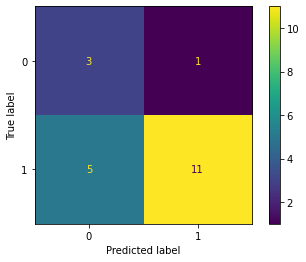

In [109]:
plot_confusion_matrix(log_model, x_test, y_test)

In [110]:
accuracy_score(y_test, y_pred)

0.7

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.92      0.69      0.79        16

    accuracy                           0.70        20
   macro avg       0.65      0.72      0.64        20
weighted avg       0.81      0.70      0.73        20



## Karar Ağaçları

In [112]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(2499.7901785714284, 2823.7000000000003, 'Genel Akademik Not Ortalamanız_3+ <= 0.5\ngini = 0.497\nsamples = 80\nvalue = [37, 43]\nclass = Yüksek'),
 Text(2010.294642857143, 2491.5, 'Sınıfınız_3. <= 0.5\ngini = 0.484\nsamples = 61\nvalue = [36, 25]\nclass = Düşük'),
 Text(1390.017857142857, 2159.3, 'Evinizde ne kadar kitap vardır?_1-50 <= 0.5\ngini = 0.499\nsamples = 40\nvalue = [19, 21]\nclass = Yüksek'),
 Text(747.3214285714286, 1827.1, 'Yaşınız <= 21.5\ngini = 0.452\nsamples = 29\nvalue = [10, 19]\nclass = Yüksek'),
 Text(239.14285714285714, 1494.9, 'Hangi vakitler kitap okumayı tercih edersiniz?_Öğle <= 0.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = Yüksek'),
 Text(119.57142857142857, 1162.6999999999998, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = Yüksek'),
 Text(358.7142857142857, 1162.6999999999998, 'Çevreniz kitap okuma alışkanlığınızı etkiliyor mu? <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Düşük'),
 Text(239.14285714285714, 830.5, 'gini = 0.0

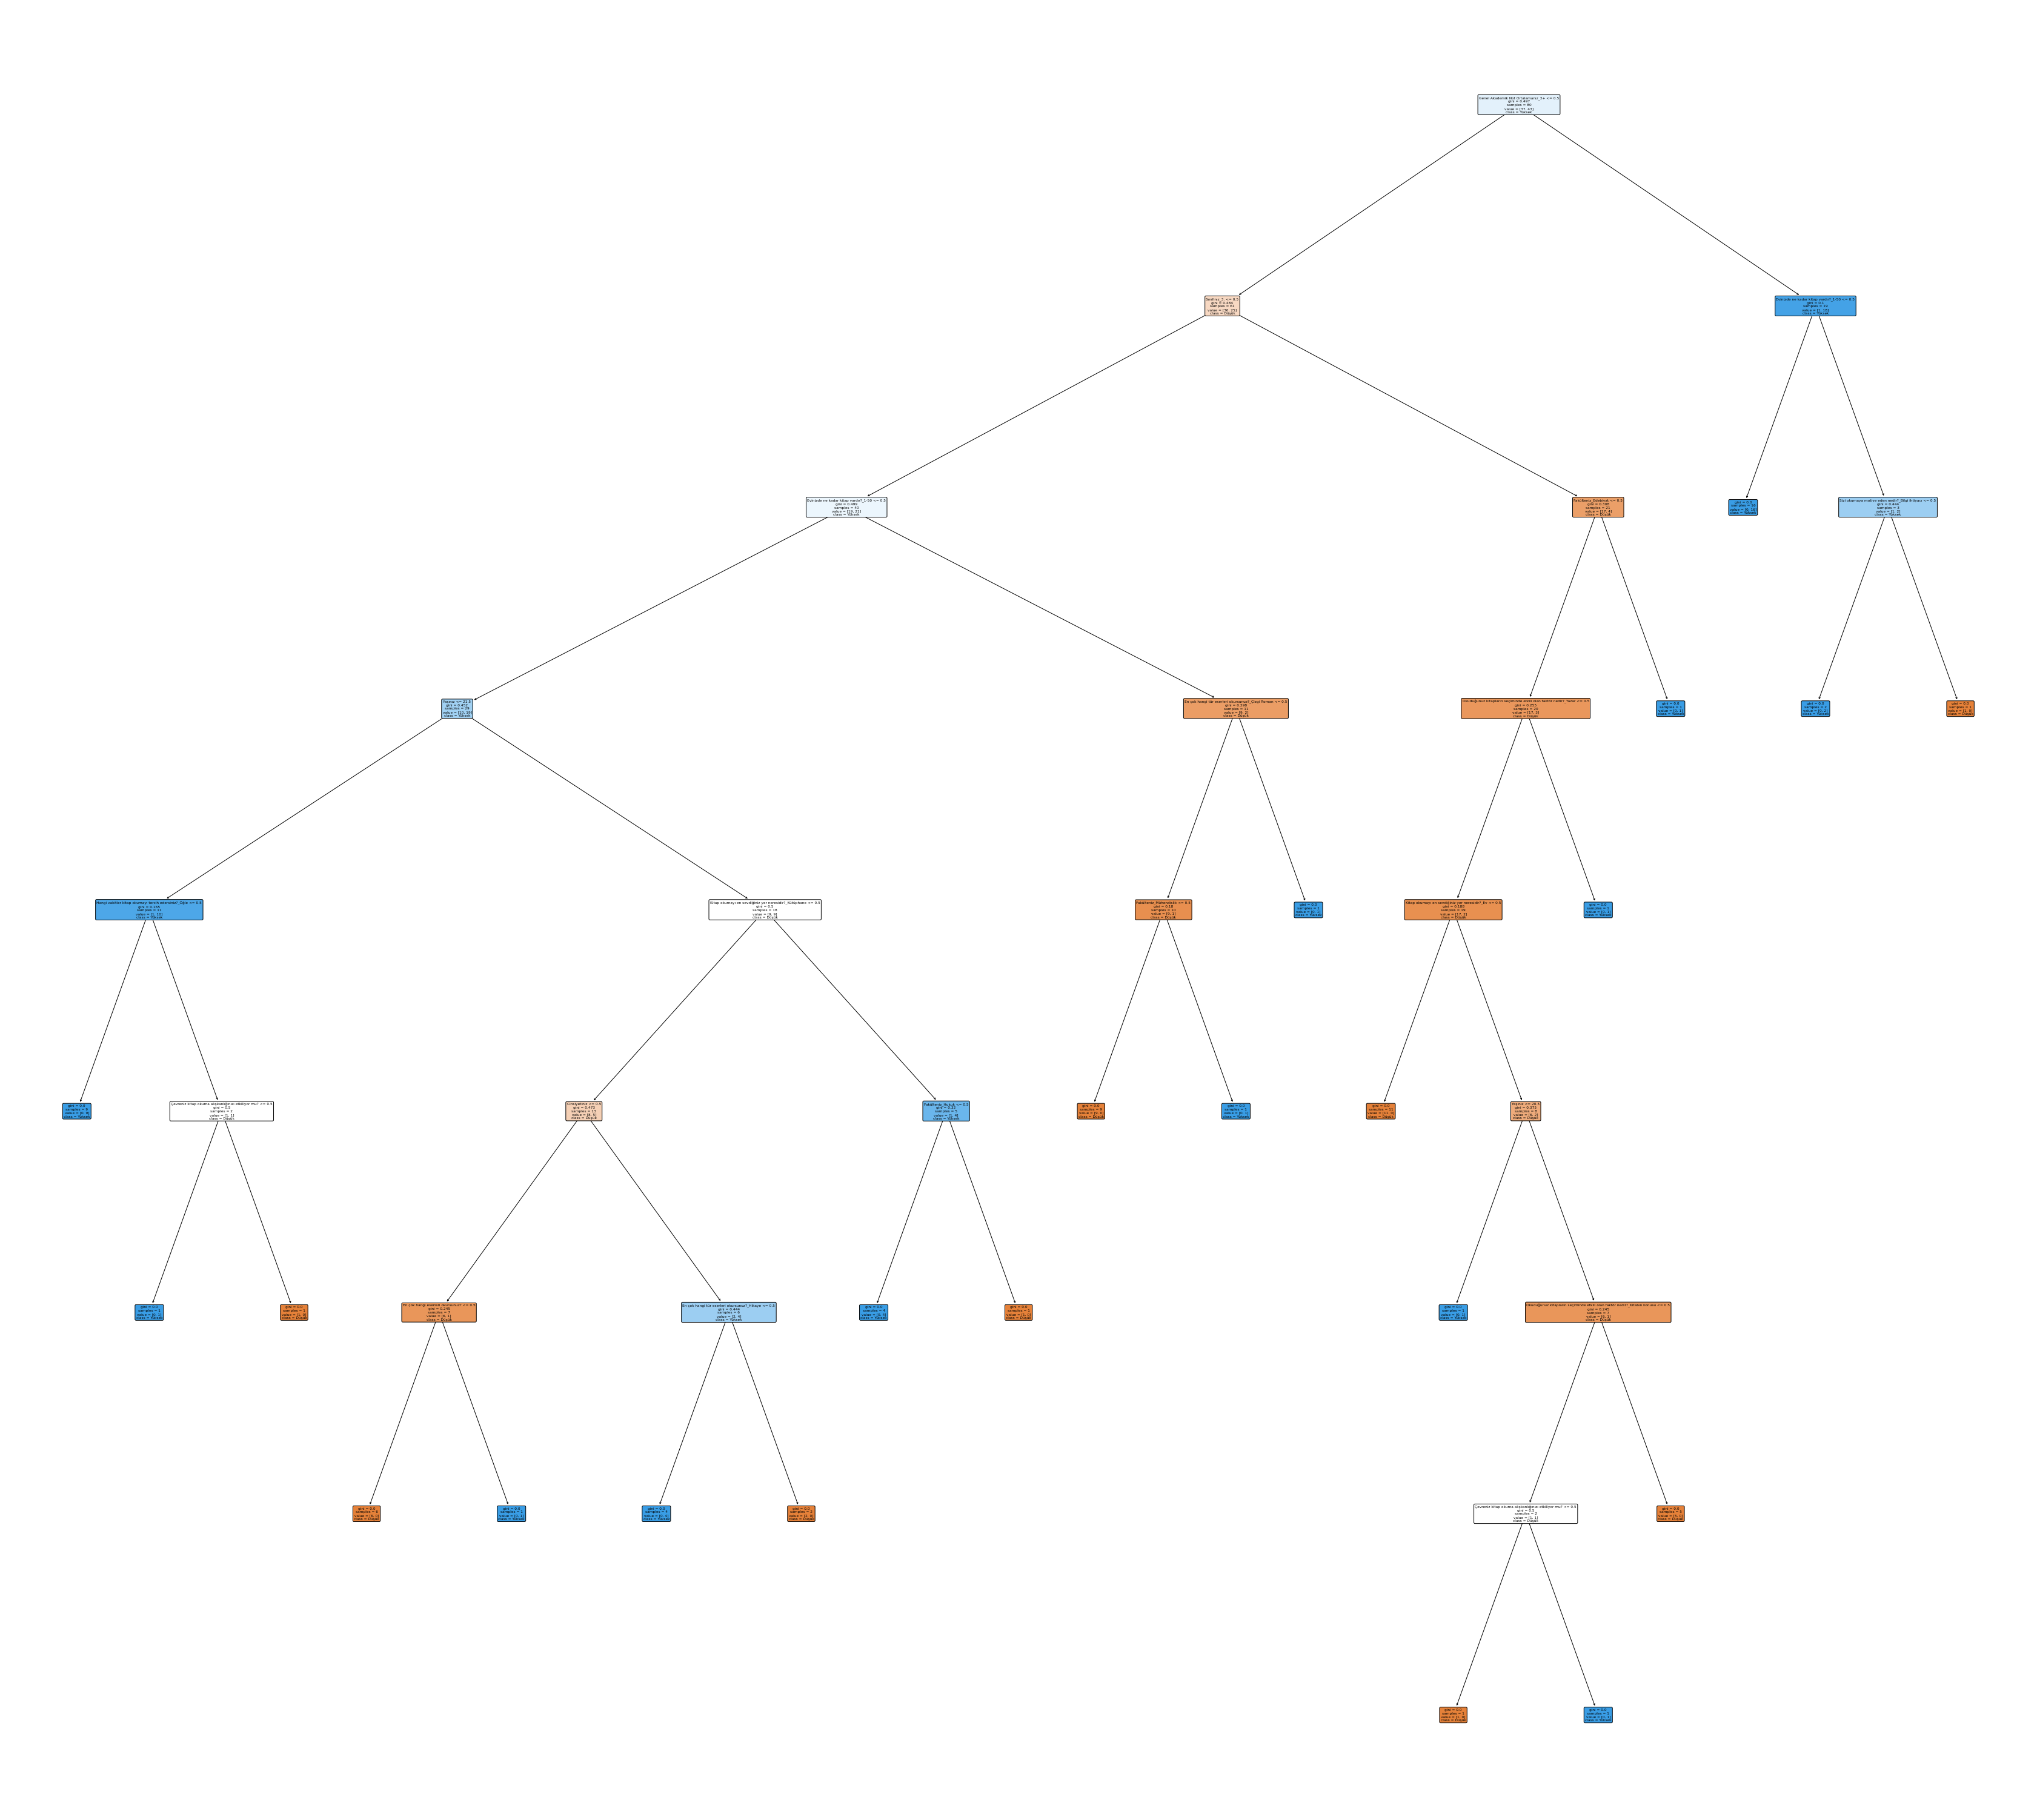

In [113]:
fig = plt.figure(figsize=(60,55))
tree.plot_tree(decision_model,rounded=True, class_names=["Düşük","Yüksek"], feature_names=x.columns, filled=True)

In [114]:
y_pred2 = decision_model.predict(x_test)

In [115]:
y_pred_prob2 = decision_model.predict_proba(x_test)[:,1]

In [116]:
confusion_matrix(y_test, y_pred2)

array([[ 3,  1],
       [ 6, 10]], dtype=int64)

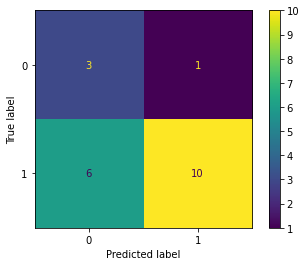

In [117]:
plot_confusion_matrix(decision_model, x_test, y_test)

In [118]:
mean_squared_error(y_test, y_pred2)

0.35

In [119]:
accuracy_score(y_test, y_pred2)

0.65

In [120]:
## max depth genişliği default olarak belirlendiğinde %60'lık bir sonuçla karşılaşılır
# Bu nedenle çapraz arama sonuçlarına ihtiyaç duyulur. (en uygun hiperparametre için)

In [121]:
cart = DecisionTreeClassifier()
cart_params = {"max_depth":[1,3,5,7,10,13,15,17,20,25,27,30,33,35,38,40],
              "min_samples_split" : [1,3,5,10,20,30,40,50]}

In [122]:
cart_model_cv = GridSearchCV(cart, cart_params, cv=5, n_jobs=-1, verbose=2)
cart_model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


C:\Users\Seher\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [   nan 0.675  0.675  0.675  0.675  0.675  0.675  0.675     nan 0.5875
 0.5875 0.5875 0.5875 0.5875 0.575  0.6       nan 0.5875 0.5625 0.5875
 0.5625 0.575  0.575  0.6       nan 0.6375 0.65   0.625  0.5625 0.575
 0.575  0.6       nan 0.625  0.6375 0.625  0.5625 0.575  0.575  0.6
    nan 0.6625 0.625  0.625  0.5625 0.575  0.575  0.6       nan 0.6375
 0.6375 0.6125 0.5625 0.575  0.575  0.6       nan 0.6375 0.65   0.625
 0.5625 0.575  0.575  0.6       nan 0.6375 0.65   0.6375 0.5625 0.575
 0.575  0.6       nan 0.625  0.6375 0.625  0.5625 0.575  0.575  0.6
    nan 0.6375 0.625  0.6125 0.5625 0.575  0.575  0.6       nan 0.65
 0.625  0.6125 0.5625 0.575  0.575  0.6       nan 0.6375 0.65   0.625
 0.5625 0.575  0.575  0.6       nan 0.625  0.625  0.625  0.5625 0.575
 0.575  0.6       nan 0.6125 0.6375 0.6375 0.5625 0.575  0.575  0.6
    nan 0.6375 0.6375

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 10, 13, 15, 17, 20, 25, 27,
                                       30, 33, 35, 38, 40],
                         'min_samples_split': [1, 3, 5, 10, 20, 30, 40, 50]},
             verbose=2)

In [123]:
cart_model_cv.best_params_

{'max_depth': 1, 'min_samples_split': 3}

In [124]:
model_cart = DecisionTreeClassifier(max_depth=3, min_samples_split=20)
model_cart.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=20)

In [125]:
cart_pred = model_cart.predict(x_test)

In [126]:
cart_pred_prob = model_cart.predict_proba(x_test)[:,1]

In [127]:
accuracy_score(y_test,cart_pred)

0.8

In [128]:
confusion_matrix(y_test, cart_pred)

array([[ 3,  1],
       [ 3, 13]], dtype=int64)

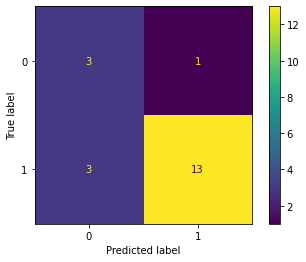

In [129]:
plot_confusion_matrix(model_cart, x_test, y_test)

In [ ]:
## Yukarıda iki farklı parametre denemesiyle karar ağaçları oluşturulmuştur 

## Statsmodel kütüphanesi ile lojistik regresyon 

In [92]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

In [93]:
X = veri.loc[:,"Sınıfınız_3.":"Evinizde ne kadar kitap vardır?_51-100"]
#X= X.drop(["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"],axis=1)
X= sm.add_constant(X)

C:\Users\Seher\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [133]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   Zaman damgası                                                                    100 non-null    object
 1   Cinsiyetiniz                                                                     100 non-null    int32 
 2   Yaşınız                                                                          100 non-null    int64 
 3   Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?                            100 non-null    int64 
 4   En çok hangi eserleri okursunuz?                                                 100 non-null    int32 
 5   Çizgi Romanların kitap okuma alışkanlığı kazandırdığını düşünüyor musunuz?       100 non-null    int32 
 6   Sevmediğiniz kitapl

In [94]:
y = veri["Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?"]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [96]:
logit = sm.GLM(y_train,
               x_train,
               family=sm.families.Binomial())
logit_model=logit.fit()

C:\Users\Seher\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [97]:
print(logit_model.summary())

                                   Generalized Linear Model Regression Results                                   
Dep. Variable:     Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?   No. Observations:                   80
Model:                                                               GLM   Df Residuals:                       65
Model Family:                                                   Binomial   Df Model:                           14
Link Function:                                                     logit   Scale:                          1.0000
Method:                                                             IRLS   Log-Likelihood:                    nan
Date:                                                   Fri, 13 May 2022   Deviance:                       64.003
Time:                                                           14:23:49   Pearson chi2:                     61.0
No. Iterations:                                                       16                

C:\Users\Seher\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\Seher\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


In [ ]:
## Genelleştirilmiş doğrusal modeller (Generalized Linear Models) doğrusal ve doğrusal olmayan regresyon modellerinin tamamını kapsar.
## Hatta çoklu doğrusal regresyon GLM'nin özel bir durumudur
# GLM Binomial olduğunda logit fonksiyonu kullanılarak Lojistik regresyon yapılır
# GLM Gaussian ailesinde olduğunda doğrusal regresyon
# GLM poisson ailesinde olduğunda ise loglinear model kullanılır.

## Bu nedenle statsmodels kütüphanesinde GLM ve sm.Logit algoritmaları ile lojistik regresyon yapılabilir.

In [130]:
logitt = sm.Logit(y_train, x_train)
logitt_modell = logitt.fit()

         Current function value: 0.513958
         Iterations: 35


C:\Users\Seher\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [131]:
print(logitt_modell.summary())
## 0.2 ile 0.4 arasındaki Pseudo R-squared değeri çok iyi bir model uyumunu belirtir

                                             Logit Regression Results                                            
Dep. Variable:     Kitap Okuma Alışkanlığınızı Nasıl Ölçeklendirirsiniz?   No. Observations:                   80
Model:                                                             Logit   Df Residuals:                       66
Method:                                                              MLE   Df Model:                           13
Date:                                                   Wed, 11 May 2022   Pseudo R-squ.:                  0.2555
Time:                                                           17:43:41   Log-Likelihood:                -41.117
converged:                                                         False   LL-Null:                       -55.227
Covariance Type:                                               nonrobust   LLR p-value:                  0.008432
                                                              coef    std err          z

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 34 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   const                                                                            61 non-null     float64
 1   Cinsiyetiniz                                                                     61 non-null     int32  
 2   Yaşınız                                                                          61 non-null     int64  
 3   En çok hangi eserleri okursunuz?                                                 61 non-null     int32  
 4   Çizgi Romanların kitap okuma alışkanlığı kazandırdığını düşünüyor musunuz?       61 non-null     int32  
 5   Sevmediğiniz kitapları yarım bırakır mısınız?                                    61 non-null     int32  
 6   Okuduğunuz b

## Destek Vektör Makineleri (Support Vector Machines)

In [130]:
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(x_train, y_train)
## Burada yöntemi "kernel" olarak tercih etmeliyiz
## çünkü 20 niteliğe karşı 100 gözlem analizimiz için yeterli değildir.
## bu nedenle düşük boyutlu ve karmaşık veriler için kernel trics (çekirdek hilesi) tercih edilmelidir.


SVC(probability=True)

In [131]:
svm_pred = svm_model.predict(x_test)

In [132]:
svm_pred_prob = svm_model.predict_proba(x_test)[:,1]

In [133]:
accuracy_score(y_test, svm_pred)

0.8

In [134]:
mean_squared_error(y_test, svm_pred)

0.2

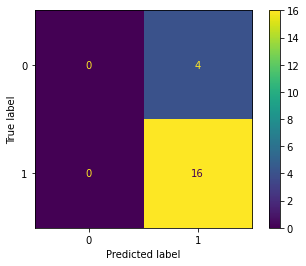

In [135]:
plot_confusion_matrix(svm_model, x_test, y_test)

In [20]:
### ızgara araması yöntemi ile en uygun hiperparametreyi belirleyelim

In [136]:
svm_tuned = SVC()
svm_params = {'C': [0.1, 0.5, 1, 10, 50, 75, 100, 500, 1000, 3000], 'kernel': ['linear']},
[{'C': [0.1, 0.5, 1, 10, 50, 75, 100, 500, 1000, 3000], 'gamma': [0.1, 0.3, 0.5, 0.8, 1, 2, 5, 7, 10, 20, 50, 100],
 'kernel': ['rbf']}]

[{'C': [0.1, 0.5, 1, 10, 50, 75, 100, 500, 1000, 3000],
  'gamma': [0.1, 0.3, 0.5, 0.8, 1, 2, 5, 7, 10, 20, 50, 100],
  'kernel': ['rbf']}]

In [137]:
svm_grid =GridSearchCV(svm_tuned, svm_params, cv=5, n_jobs=-1, verbose=2) 
svm_grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=({'C': [0.1, 0.5, 1, 10, 50, 75, 100, 500, 1000, 3000],
                          'kernel': ['linear']},),
             verbose=2)

In [138]:
svm_grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [139]:
svm_yeni = SVC(C=0.1, kernel="linear", probability=True)
svm_yeni.fit(x_train,y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [140]:
svm_pred2 = svm_yeni.predict(x_test)

In [141]:
svm_pred_prob2 = svm_yeni.predict_proba(x_test)[:,1]

In [142]:
accuracy_score(y_test, svm_pred2)

0.65

In [143]:
mean_squared_error(y_test, svm_pred2)

0.35

## Gradient Boosting Machines

In [144]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [145]:
gbm_pred = gbm_model.predict(x_test)

In [146]:
gbm_pred_prob = gbm_model.predict_proba(x_test)[:,1]

In [147]:
accuracy_score(y_test, gbm_pred)

0.7

In [14]:
## uygun parametreleri arayalım
## learnin rate: öğrenme oranı
## n_estimator: gradient boosting modelinde kullanılacak ağaç sayısıdır. (learning rate ile ilişkili)
## max_depth: ağaç derinliği (genellemeyi (ezberi) etkiler)

## Gradient Boosting algortimasının temeli ağaçlara dayanan bir yöntemdir.
## Ancak burada karar ağacında olduğu gibi tek bir ağaç yoktur.
## Gradient Boosting algortimasında amaç, zayıf sınıflandırıcıları bir araya getirerek güçlü bir tahmin modeli oluşturmaktır.
# Adaptive Boosting yaklaşımından doğmuştur. (Ada Boost)
## Güçlü bir algortimadır ancak en belirgin dezavantajı karmaşık olması ve yorumlanabilirliğinin düşük olması

In [148]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

gbm_params = {"learning_rate":[0.1, 0.01, 0.001, 0.5],
             "n_estimators":[100, 300, 500, 100],
             "max_depth":[2,3,5,8,10,20,30,40]}

gbm_grid = HalvingGridSearchCV(gbm_model, gbm_params, cv=10)
gbm_grid.fit(x_train,y_train)

HalvingGridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                    param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.5],
                                'max_depth': [2, 3, 5, 8, 10, 20, 30, 40],
                                'n_estimators': [100, 300, 500, 100]},
                    refit=<function _refit_callable at 0x000001D643EAC1F0>)

In [149]:
gbm_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}

In [166]:
gbm_yeni = GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=100)
gbm_yeni.fit(x_train,y_train)

gbm_yeni_pred = gbm_yeni.predict(x_test)
gbm_tuned_prob = gbm_yeni.predict_proba(x_test)[:,1]

In [153]:
accuracy_score(y_test, gbm_yeni_pred)

0.75

## Random Forest

In [32]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
rf_pred = rf_model.predict(x_test)

In [161]:
rf_pred_prob = rf_model.predict_proba(x_test)[:,1]

In [34]:
accuracy_score(y_test, rf_pred)

0.7

In [35]:
## Random forest algoritmasının önemli iki parametresi vardır.
# Ağaç sayısı ve seçilecek değişken sayısıdır.
## Bunların dışında maksimum ağaç derinliği de belirlenebilir.

In [36]:
x_train.shape

(80, 51)

In [37]:
rf = RandomForestClassifier()

In [89]:
rf_params = {"n_estimators":[100, 200, 500, 1000],
            "max_features":[10, 20,30],
            "min_samples_split":[2,5,10,20]}

In [90]:
rf_grid = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1)
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500, 1000]})

In [91]:
rf_grid.best_params_

{'max_features': 20, 'min_samples_split': 2, 'n_estimators': 100}

In [95]:
rf_tuned= RandomForestClassifier(max_features= 20, min_samples_split=2, n_estimators =200)
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=20, n_estimators=200)

In [96]:
rf_tuned_pred = rf_tuned.predict(x_test)

In [160]:
rf_tuned_prob = rf_tuned.predict_proba(x_test)[:,1]

In [97]:
accuracy_score(y_test, rf_tuned_pred)

0.7

In [77]:
## !!!!!! değişkenlerin önem düzeyi

In [78]:
rf_tuned.feature_importances_

array([0.01881896, 0.07980834, 0.01360314, 0.01624726, 0.02461868,
       0.02102659, 0.03174948, 0.01359568, 0.01724654, 0.01132519,
       0.02468281, 0.0123445 , 0.        , 0.01841113, 0.00290493,
       0.00995374, 0.00810431, 0.01028853, 0.00672657, 0.03533693,
       0.01669912, 0.01983457, 0.00867587, 0.00829267, 0.01878717,
       0.12664525, 0.01908924, 0.00971846, 0.01106449, 0.01756384,
       0.01178762, 0.01861836, 0.01075438, 0.00765978, 0.08144171,
       0.01648277, 0.01293821, 0.01231563, 0.00404027, 0.0208691 ,
       0.00877578, 0.01218286, 0.00655066, 0.01819265, 0.01220128,
       0.02613712, 0.03271932, 0.00998668, 0.0150719 , 0.01701612,
       0.01109382])

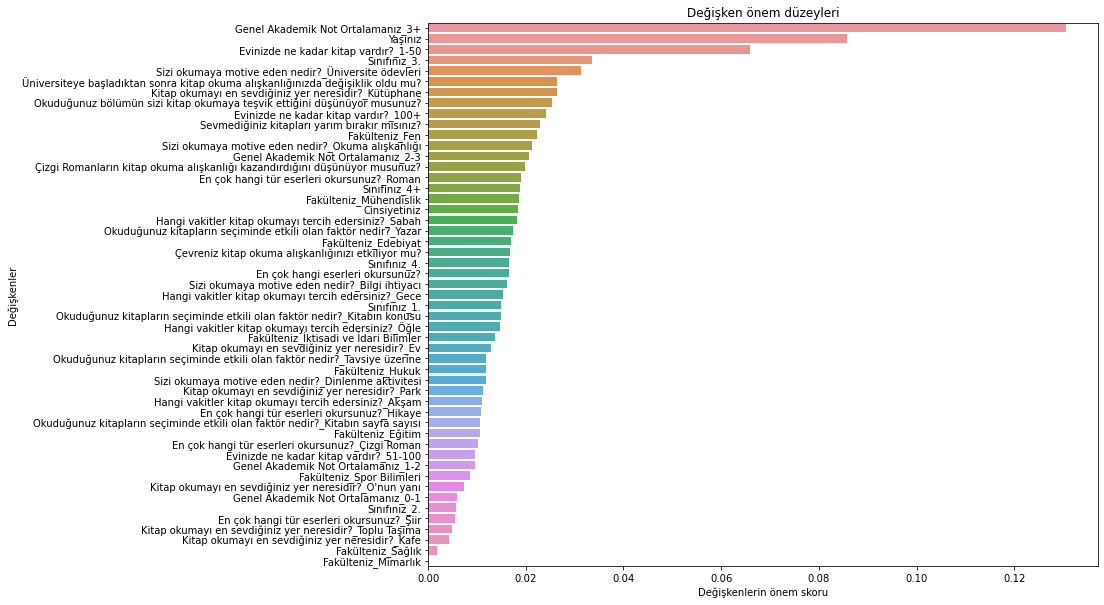

In [98]:
plt.subplots(1, figsize=(12,10))
feature_imp = pd.Series(rf_tuned.feature_importances_,
                       index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişkenlerin önem skoru")
plt.ylabel("Değişkenler")
plt.title("Değişken önem düzeyleri")
plt.show()

### ROC Graph

In [167]:
logit_roc_auc = roc_auc_score(y_test, y_pred_prob)
decision_roc_auc = roc_auc_score(y_test, y_pred_prob2)
tuned_decision_roc_auc = roc_auc_score(y_test, cart_pred_prob)
svm_roc_auc = roc_auc_score(y_test, svm_pred_prob)
tuned_svm_roc_auc = roc_auc_score(y_test, svm_pred_prob2)
gbm_roc_auc = roc_auc_score(y_test, gbm_pred_prob)
tuned_gbm_roc_auc = roc_auc_score(y_test, gbm_tuned_prob)
rf_model_roc_auc = roc_auc_score(y_test, rf_pred)
tuned_rf_roc_auc = roc_auc_score(y_test, rf_tuned_pred)

In [168]:
log_fpr, log_tpr, thresholds = roc_curve(y_test, y_pred_prob)
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred_prob2)
tuned_decision_fpr, tuned_decision_tpr, thresholds = roc_curve(y_test, cart_pred_prob)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_pred_prob)
tuned_svm_fpr, tuned_svm_tpr, thresholds = roc_curve(y_test, svm_pred_prob2)
gbm_fpr, gbm_tpr, thresholds = roc_curve(y_test, gbm_pred_prob)
tuned_gbm_fpr, tuned_gbm_tpr, thresholds = roc_curve(y_test, gbm_tuned_prob)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_pred_prob)
tuned_rf_fpr, tuned_rf_tpr, thresholds = roc_curve(y_test, rf_tuned_prob)

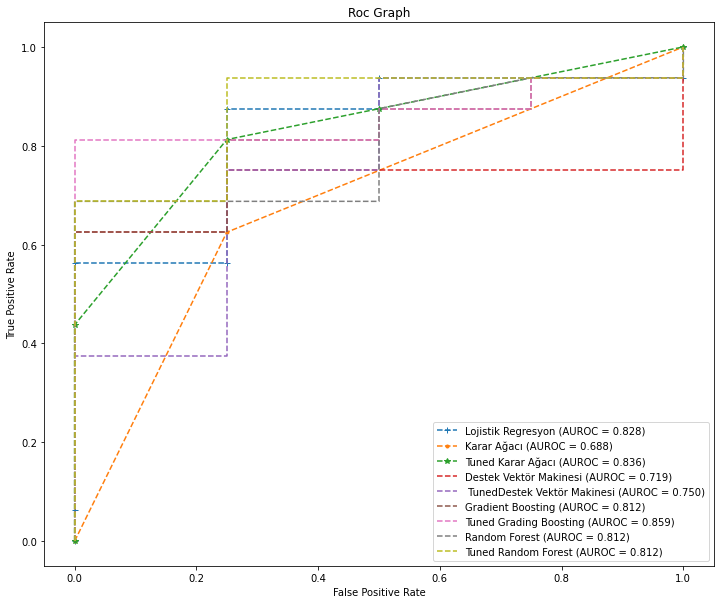

In [170]:
plt.subplots(1, figsize=(12,10))
plt.plot(log_fpr, log_tpr, ls="--", marker="+" ,label='Lojistik Regresyon (AUROC = %0.3f)' % logit_roc_auc)
plt.plot(decision_fpr, decision_tpr, ls= "--", marker=".", label='Karar Ağacı (AUROC = %0.3f)' % decision_roc_auc)
plt.plot(tuned_decision_fpr, tuned_decision_tpr, ls= "--" ,marker="*", label= 'Tuned Karar Ağacı (AUROC = %0.3f)' % tuned_decision_roc_auc)
plt.plot(svm_fpr, svm_tpr, ls="--", label='Destek Vektör Makinesi (AUROC = %0.3f)' %svm_roc_auc)
plt.plot(tuned_svm_fpr, tuned_svm_tpr, ls="--", label=' TunedDestek Vektör Makinesi (AUROC = %0.3f)' %tuned_svm_roc_auc)
plt.plot(gbm_fpr, gbm_tpr, ls="--", label='Gradient Boosting (AUROC = %0.3f)' %gbm_roc_auc)
plt.plot(tuned_gbm_fpr, tuned_gbm_tpr, ls="--", label='Tuned Grading Boosting (AUROC = %0.3f)' %tuned_gbm_roc_auc)
plt.plot(rf_fpr, rf_tpr, ls="--", label = 'Random Forest (AUROC = %0.3f)' %rf_model_roc_auc)
plt.plot(tuned_rf_fpr, tuned_rf_tpr, ls="--", label='Tuned Random Forest (AUROC = %0.3f)' %tuned_rf_roc_auc)

plt.title("Roc Graph")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend()

plt.show()

In [2]:
## Yukarıdaki grafiğe bakıldığında eğrilerin altında kalan alanlardan yola çıkarak tahmin yürütmede karar ağacının başarılı olduğu yorumu yapılabilir.